In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

rev_df = pd.read_csv('Reviews.csv')
rev_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Reviews.csv contains data about products and their reviews from Internet.

Removing punctation:

In [20]:
rev_df['Summary'] = rev_df['Summary'].astype(str) 
rev_df["Summary"] = rev_df["Summary"].apply(remove_punctuation)


Checking missing values in variables:

In [21]:
rev_df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               1
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

We can see that there are no missing values in the dataset.

Dropping all the entries with neutral sentiment:

In [22]:
rev_df = rev_df[rev_df.Score != 3]
#short test:
sum(rev_df["Score"] == 3)

0

 Setting all positive ratings to 1 and negative to -1:

In [23]:
rev_df["Score"].replace(2, -1, inplace=True)
rev_df["Score"].replace(1, -1, inplace=True)
rev_df["Score"].replace(4, 1, inplace=True)
rev_df["Score"].replace(5, 1, inplace=True)
#short test:
sum(rev_df["Score"]**2 != 1)

0

Plotting the results:

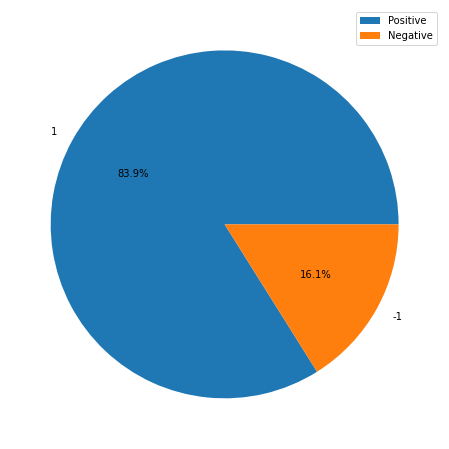

In [24]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.pie(rev_df['Score'].value_counts(), labels=rev_df['Score'].unique().tolist(), autopct='%1.1f%%')
labels = ['Positive', 'Negative']
plt.legend(labels)
plt.show()

We see that most of opinions are positive.

Splitting data into training and test:

In [44]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(rev_df, train_size=0.8, test_size=0.2)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

x_train = vectorizer.fit_transform(list(train ["Summary"]))
y_train = train ["Score"]
x_test = vectorizer.transform(list(test["Summary"]))
y_test = test["Score"]



Training LogisticRegression model on training data:

In [46]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
z_coef = list(zip(list(range(model.coef_.shape[1])), model.coef_[0]))
sort = sorted(z_coef, key= lambda v: v[1])
sort = np.array(sort)
index = sort[:, 0].astype(int)

words = np.array(vectorizer.get_feature_names())
pos = words[index[-10:]]
neg = words[index[:10]]

print("Positive words: ", pos)
print("Negative words: ", neg)

Positive words:  ['smooth' 'yummy' 'amazing' 'wonderful' 'yum' 'perfect' 'awesome'
 'delicious' 'best' 'excellent']
Negative words:  ['yuck' 'horrible' 'awful' 'disappointed' 'terrible' 'disappointing'
 'worst' 'hates' 'nasty' 'concept']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Predicting the sentiment:

In [48]:
pred = model.predict(x_test)
print(pred)

[1 1 1 ... 1 1 1]


In [49]:
pred_2 = model.predict_proba(x_test)
print(pred_2)

[[0.02744083 0.97255917]
 [0.01031036 0.98968964]
 [0.137111   0.862889  ]
 ...
 [0.00294299 0.99705701]
 [0.00369233 0.99630767]
 [0.14919139 0.85080861]]


In [50]:
print("Positive reviews: ", test.iloc[pred_2.T[1].argmax()]["Summary"])
print("Negative: reviews", test.iloc[pred_2.T[0].argmax()]["Summary"])

Positive reviews:  Excellent KCup Coffee Perfect Brew for Me
Negative: reviews AWFUL AWFUL AWFUL


Accuracy of predictions:

In [51]:
model.score(x_test, y_test)

0.9053328561202577

Decision Tree Classifier with criterion gini index:

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(x_train, y_train)
# fit the model
clf_gini.fit(x_train, y_train)

y_pred_gini = clf_gini.predict(x_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8604


In [54]:
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8579


In [55]:
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.8579
Test set score: 0.8604


Here, the training-set accuracy score is 0.8537 while the test-set accuracy to be 0.8558. These two values are quite comparable. So, there is no sign of overfitting.

Visualizing decision-trees:

[Text(0.5, 0.875, 'X[4671] <= 0.5\ngini = 0.27\nsamples = 22352\nvalue = [3592, 18760]'),
 Text(0.25, 0.625, 'X[3051] <= 0.5\ngini = 0.239\nsamples = 21328\nvalue = [2965, 18363]'),
 Text(0.125, 0.375, 'X[549] <= 0.5\ngini = 0.265\nsamples = 18439\nvalue = [2905, 15534]'),
 Text(0.0625, 0.125, 'gini = 0.261\nsamples = 18347\nvalue = [2831, 15516]'),
 Text(0.1875, 0.125, 'gini = 0.315\nsamples = 92\nvalue = [74, 18]'),
 Text(0.375, 0.375, 'X[1008] <= 0.5\ngini = 0.041\nsamples = 2889\nvalue = [60, 2829]'),
 Text(0.3125, 0.125, 'gini = 0.027\nsamples = 2806\nvalue = [39, 2767]'),
 Text(0.4375, 0.125, 'gini = 0.378\nsamples = 83\nvalue = [21, 62]'),
 Text(0.75, 0.625, 'X[1008] <= 0.5\ngini = 0.475\nsamples = 1024\nvalue = [627, 397]'),
 Text(0.625, 0.375, 'X[549] <= 0.5\ngini = 0.43\nsamples = 855\nvalue = [588, 267]'),
 Text(0.5625, 0.125, 'gini = 0.403\nsamples = 810\nvalue = [583, 227]'),
 Text(0.6875, 0.125, 'gini = 0.198\nsamples = 45\nvalue = [5, 40]'),
 Text(0.875, 0.375, 'X[7562] 

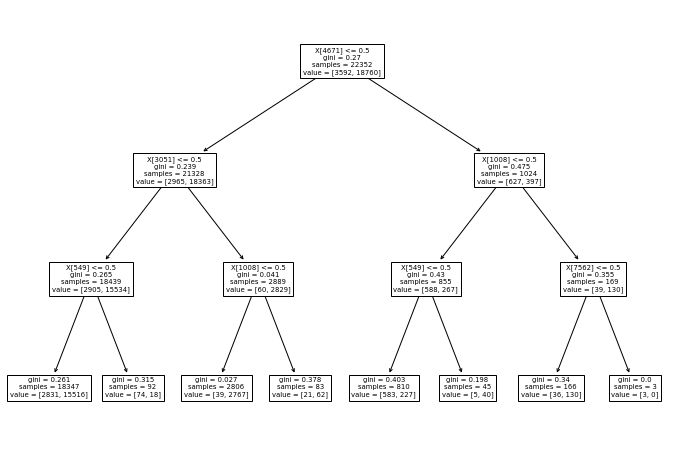

In [56]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train)) 